In [ ]:
#Student Name: Liguangxuan He
#Student ID: 1006141809
#Instructor Name: Prof. Shion Guha
#Course Code: INF2178
#Course Name: Experimental Design for Data Science
#Program: Master of Information
#Faculty: Faculty of Information
#School: University of Toronto

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
#load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
%pip install bioinfokit
from bioinfokit.analys import stat

In [3]:
#read excel from drive
file_path = '/content/drive/MyDrive/Inf2178 Assignment/Technical 2/INF2178_A2_data.xlsx'
df = pd.read_excel(file_path, sheet_name = 'ChildCareCentres')
#display first 6 rows
df.head(6)

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
5,6,1021,Centennial College Progress Campus Child Care ...,Non Profit Agency,941 PROGRESS AVE,M1G 3T8,24,Community College/University,Centennial College Of Applied Arts & Technology,10,20,32,0,0,62,Y,Y


In [4]:
#check basic information about the data such as column names, data types, non-null counts.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB
None


In [5]:
#cleaning the data:
#1.handling Missing Values
#filling missing values in the 'BLDGNAME' column with 'Not Specified'
df['BLDGNAME'].fillna('Not Specified', inplace=True)

#2.data type conversion (just in case)
#converting 'PCODE' column to string type (object)
df['PCODE'] = df['PCODE'].astype(str)

#3.column renaming (to better format)
df.rename(columns={'_id':'ID'}, inplace = True)

#4.removing duplicates (just in case)
#dropping duplicate rows, since values in 'ID' should be unique
df.drop_duplicates(inplace=True)

#display first 6 rows after cleaned
df.head(6)

,ID,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,Not Specified,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,Not Specified,0,10,16,0,0,26,Y,Y
5,6,1021,Centennial College Progress Campus Child Care ...,Non Profit Agency,941 PROGRESS AVE,M1G 3T8,24,Community College/University,Centennial College Of Applied Arts & Technology,10,20,32,0,0,62,Y,Y


The columns that I'm interested in are 'AUSPICE', 'cwelcc_flag' and 'TOTSPACE', therefore I've wanted to make sure that they are ready for future use.

In [10]:
#filter out any missing values in these columns
df = df.dropna(subset=['AUSPICE','cwelcc_flag','TOTSPACE'])

In [11]:
#check basic information about the data again
#after cleaning
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     1063 non-null   object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 149.5+ KB
None


Now, I've did some slight cleaning, I wanted to create a loop that iterates over the columns in the DataFrame which are of data type 'object' because I want to see the categorical variables contain in those columns (especially in 'cwelcc_flag' and 'AUSPICE'), because it will be used later when doing anova tests.

In [12]:
#display category counts for 'cwelcc_flag' and 'AUSPICE' columns
columns_of_interest = ['cwelcc_flag', 'AUSPICE'] # these are already object datatype columns
#check categories for each column
for column in columns_of_interest:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: cwelcc_flag
Y    926
N    137
Name: cwelcc_flag, dtype: int64


Column: AUSPICE
Non Profit Agency                703
Commercial Agency                321
Public (City Operated) Agency     39
Name: AUSPICE, dtype: int64




I've wanted to visually demostrate the distribution of total childcare spaces across different auspices and the interaction effect between participation in cwelcc and auspice on total spaces.
The reason why I've wanted to create these two graphs is because it give me an insight towards doing anova analysis.  
1. Boxplot: visualizes the distribution of total childcare spaces across different auspices. This plot helps in visually assessing the variance and central tendency od total space available under different management types, corresponding to the one-way ANOVA analysis.    
2. Boxplot: visualize the distribution of total childcare space acoss the combination of auspices and whether or not participate in cwelcc. corresponding to the two-way ANOVA anlysis.

<ipython-input-65-a8e181959be5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df, palette='Greens')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seabor

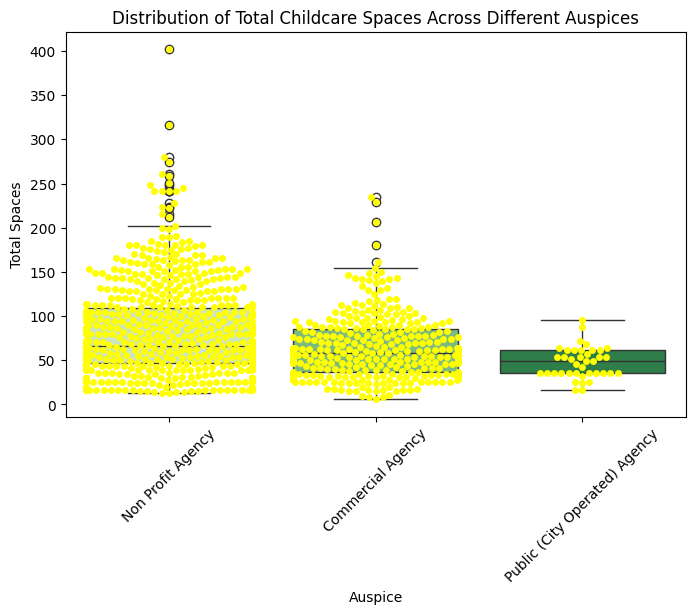

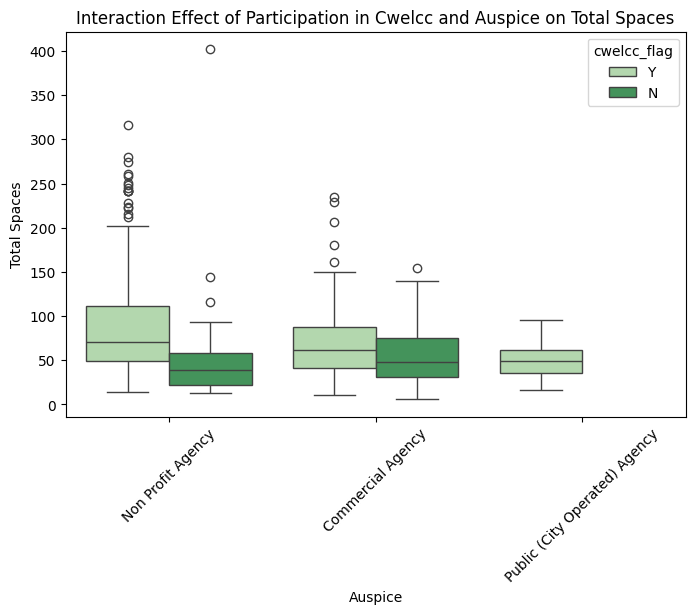

In [65]:
#plotting the distribution of total spaces across different auspices
plt.figure(figsize = (8,5))
ax = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df, palette='Greens')
ax = sns.swarmplot(x='AUSPICE', y='TOTSPACE', data=df, color='yellow')
plt.title('Distribution of Total Childcare Spaces Across Different Auspices')
plt.xlabel('Auspice')
plt.ylabel('Total Spaces')
plt.xticks(rotation=45)  #rotate labels to improve readability
plt.show()

#plotting the distribution of total spaces considering cwelcc_flag and auspice
plt.figure(figsize = (8,5))
sns.boxplot(x='AUSPICE', y = 'TOTSPACE', hue='cwelcc_flag', data = filtered_data, palette='Greens')
plt.title('Interaction Effect of Participation in Cwelcc and Auspice on Total Spaces')
plt.xlabel('Auspice')
plt.ylabel('Total Spaces')
plt.xticks(rotation=45)  #rotate labels to improve readability
plt.show()

**One-way ANOVA analysis:**  
For the one-way ANOVA test, I will compare the total number of spaces across the different auspices. This analysis help us understand if the type of agency managing the childacare center (Non-profit, COmmercial, PUblic) has a significant effect on the availability of childcare spaces.

In [44]:
#ordinary least squares (OLS) model
model = ols('TOTSPACE ~ C(AUSPICE)', data = df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
round(anova_results,2)

,sum_sq,df,F,PR(>F)
C(AUSPICE),96112.11,2.0,21.84,0.0
Residual,2332065.26,1060.0,NaN,NaN


In [45]:
#one-way ANOVA table
res = stat()
res.anova_stat(df= df, res_var = 'TOTSPACE', anova_model = 'TOTSPACE ~C(AUSPICE)')
round(res.anova_summary, 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,96112.11,48056.06,21.84,0.0
Residual,1060.0,2332065.26,2200.06,NaN,NaN


In [46]:
#post hoc test using Tukey's HSD
res = stat()
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
round(res.tukey_summary,5)

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.11942,9.70360,24.53523,7.66243,0.00100
1,Non Profit Agency,Public (City Operated) Agency,34.33461,16.22408,52.44514,6.29271,0.00100
2,Commercial Agency,Public (City Operated) Agency,17.21519,-1.45315,35.88353,3.06086,0.07797


**One-way ANOVA analysis Assumption Check:**

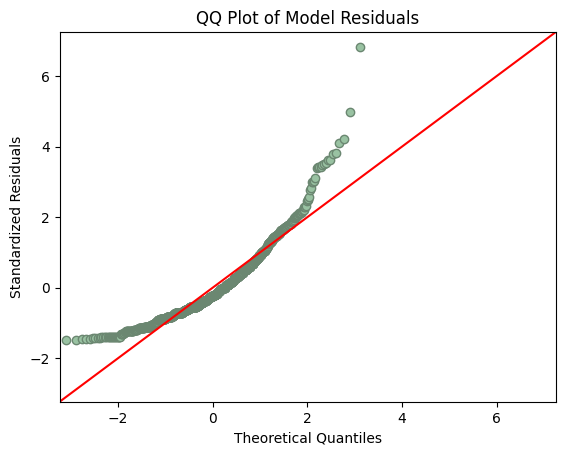

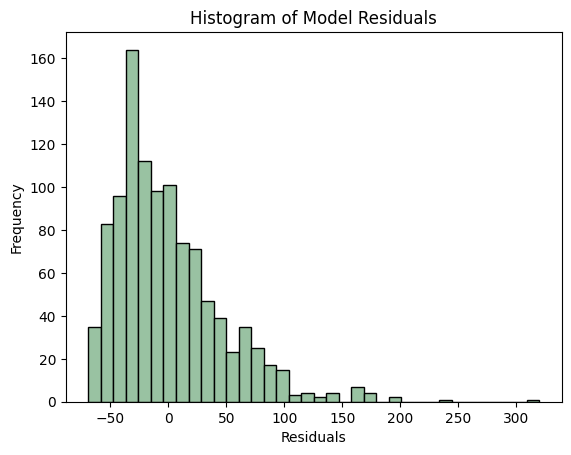

In [47]:
#checking model diagnostics
#assumption 1: Normality of residual
#res.anova_std_residuals are standardized residuals obtained from ANOVA
# boxplot
sm.qqplot(res.anova_std_residuals, line='45', fit=True, markerfacecolor='#99c2a2', markeredgecolor='#6b8771')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("QQ Plot of Model Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k', color = '#99c2a2')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram of Model Residuals")
plt.show()

In [50]:
#assumption 2: homogeneity of variances
#Levene's test(for not normally distributed samples)
res.levene(df=df, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


**Two-way ANOVA analysis:**  
For the two-way ANOVA test, we will examine the interaction effect between 'cwelcc_flag' and 'AUSPICE' on the total spaces. This analysis will explore whether the combination of participating in cwelcc and managing agency type affects the number of available childcare spaces.

In [66]:
#ordinary least squares (OLS) model
model2 = ols('TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)', data = df).fit()
anova_results2 = sm.stats.anova_lm(model2, typ=2)
round(anova_results2,2)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(AUSPICE),108334.81,2.0,25.19,0.0
C(cwelcc_flag),37688.32,1.0,17.53,0.0
C(AUSPICE):C(cwelcc_flag),29495.61,2.0,6.86,0.0
Residual,2275187.35,1058.0,NaN,NaN


In [67]:
#two-way ANOVA table
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
round(res.anova_summary,2)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,108334.81,54167.41,25.19,0.0
C(cwelcc_flag),1.0,37688.32,37688.32,17.53,0.0
C(AUSPICE):C(cwelcc_flag),2.0,29495.61,14747.81,6.86,0.0
Residual,1058.0,2275187.35,2150.46,NaN,NaN


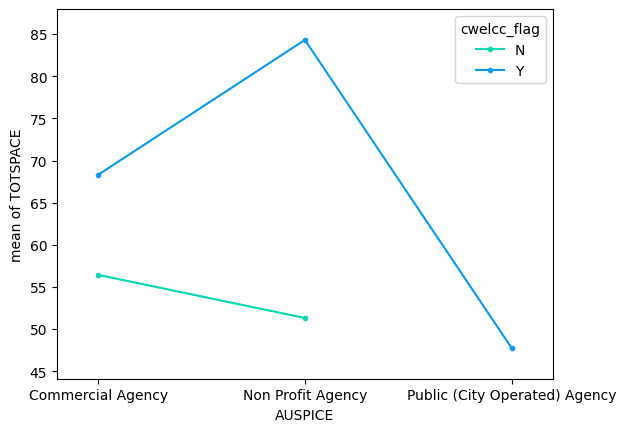

In [68]:
fig = interaction_plot(x=df['AUSPICE'],trace=df['cwelcc_flag'],response=df['TOTSPACE'],colors=['#04d8b2','#069af3'])
plt.show()

In [72]:
#First, post hoc test using Tukey's HSD
res.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var='AUSPICE',anova_model='TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
round(res.tukey_summary,2)

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.12,9.79,24.45,7.75,0.00
1,Non Profit Agency,Public (City Operated) Agency,34.33,16.43,52.24,6.36,0.00
2,Commercial Agency,Public (City Operated) Agency,17.22,-1.24,35.67,3.10,0.07


In [73]:
#Second, post hoc test using Tukey's HSD
res.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var='cwelcc_flag',anova_model='TOTSPACE ~ C(AUSPICE) + C(AUSPICE):C(cwelcc_flag)')
round(res.tukey_summary,2)

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,24.1,15.77,32.43,8.03,0.0


In [74]:
#Third, post hoc test using Tukey's HSD
res.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var=['AUSPICE','cwelcc_flag'],anova_model='TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag)+ C(AUSPICE):C(cwelcc_flag)')
round(res.tukey_summary,2)

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",32.99,13.00,52.98,6.66,0.00
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",15.99,5.86,26.12,6.38,0.00
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",27.88,12.99,42.76,7.56,0.00
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",36.54,14.72,58.36,6.76,0.00
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.00,-inf,inf,0.00,0.90
5,"(Non Profit Agency, N)","(Commercial Agency, Y)",17.00,-4.19,38.18,3.24,0.20
6,"(Non Profit Agency, N)","(Commercial Agency, N)",5.11,-18.71,28.94,0.87,0.90
7,"(Non Profit Agency, N)","(Public (City Operated) Agency, Y)",3.55,-25.13,32.23,0.50,0.90
8,"(Non Profit Agency, N)","(Public (City Operated) Agency, N)",0.00,-inf,inf,0.00,0.90
9,"(Commercial Agency, Y)","(Commercial Agency, N)",11.88,-4.57,28.33,2.92,0.31
